In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

In [2]:
happiness_cities = pd.read_csv("Happiness_Cities_weather_2018_clean.csv")
happiness_cities.head(100)

,Unnamed: 0,Overall Rank (1=Best),City,State,Total Score,Lat,Lng,DateUTC,Summary,Icon,Sunrise Time,Sunset Time,Cloud Cover,UV Index
0,0,168,Akron,OH,44.05,41.081445,-81.519005,1514786400,Foggy throughout the day.,fog,1514811149,1514844561,0.66,1
1,1,168,Akron,OH,44.05,41.081445,-81.519005,1514872800,Foggy throughout the day.,fog,1514897553,1514931012,0.52,2
2,2,168,Akron,OH,44.05,41.081445,-81.519005,1514959200,Foggy throughout the day.,fog,1514983955,1515017464,0.59,1
3,3,168,Akron,OH,44.05,41.081445,-81.519005,1515045600,Foggy throughout the day.,fog,1515070354,1515103918,0.92,1
4,4,168,Akron,OH,44.05,41.081445,-81.519005,1515132000,Foggy throughout the day.,fog,1515156751,1515190373,0.31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,35,168,Akron,OH,44.05,41.081445,-81.519005,1522990800,"Snow until morning, starting again in the even...",snow,1523012510,1523059028,0.93,5
96,36,168,Akron,OH,44.05,41.081445,-81.519005,1523077200,Foggy throughout the day.,fog,1523098813,1523145491,0.64,6
97,37,168,Akron,OH,44.05,41.081445,-81.519005,1523163600,Foggy throughout the day.,fog,1523185115,1523231955,0.54,5
98,38,168,Akron,OH,44.05,41.081445,-81.519005,1523250000,Foggy throughout the day.,fog,1523271419,1523318418,0.81,4


In [3]:
happiness_cities.columns

Index(['Unnamed: 0', 'Overall Rank (1=Best)', 'City', 'State', 'Total Score',
       'Lat', 'Lng', 'DateUTC', 'Summary', 'Icon', 'Sunrise Time',
       'Sunset Time', 'Cloud Cover', 'UV Index'],
      dtype='object')

In [4]:
# reference multiple columns within a dataframe
happiness_cities_clean = happiness_cities[["Overall Rank (1=Best)","City","State", "Total Score", "DateUTC", "Icon", "Cloud Cover", "UV Index"]]

In [5]:
happiness_cities_df = pd.DataFrame(happiness_cities_clean)
happiness_cities_df.head()

,Overall Rank (1=Best),City,State,Total Score,DateUTC,Icon,Cloud Cover,UV Index
0,168,Akron,OH,44.05,1514786400,fog,0.66,1
1,168,Akron,OH,44.05,1514872800,fog,0.52,2
2,168,Akron,OH,44.05,1514959200,fog,0.59,1
3,168,Akron,OH,44.05,1515045600,fog,0.92,1
4,168,Akron,OH,44.05,1515132000,fog,0.31,2


In [6]:
# Using .rename(columns={}) in order to rename columns
happiness_cities_new = happiness_cities_df.rename(columns={"Overall Rank (1=Best)":"Rank", "Total Score":"Total_Score","Cloud Cover":"Cloud_Cover","UV Index":"UV_Index"})
happiness_cities_new.head()

,Rank,City,State,Total_Score,DateUTC,Icon,Cloud_Cover,UV_Index
0,168,Akron,OH,44.05,1514786400,fog,0.66,1
1,168,Akron,OH,44.05,1514872800,fog,0.52,2
2,168,Akron,OH,44.05,1514959200,fog,0.59,1
3,168,Akron,OH,44.05,1515045600,fog,0.92,1
4,168,Akron,OH,44.05,1515132000,fog,0.31,2


In [12]:
import datetime
dateUTC = []
dateUTC_converted = []

#append dateUTC to dateUTC list

for index, row in happiness_cities_new.iterrows():
    dateUTC.append(happiness_cities_new["DateUTC"][index])
    
#convert dateUTC, and append datetime datatype to dateUTC_converted
for unix_time in dateUTC:
    utc_conversion = timestamp = datetime.datetime.fromtimestamp(unix_time)
    formated_by_month = utc_conversion = timestamp.strftime('%m')
    dateUTC_converted.append(formated_by_month)

#append month column to DataFrame
happiness_cities_new["Month"] = dateUTC_converted
happiness_cities_new.head()

,Rank,City,State,Total_Score,DateUTC,Icon,Cloud_Cover,UV_Index,Month
0,168,Akron,OH,44.05,1514786400,fog,0.66,1,01
1,168,Akron,OH,44.05,1514872800,fog,0.52,2,01
2,168,Akron,OH,44.05,1514959200,fog,0.59,1,01
3,168,Akron,OH,44.05,1515045600,fog,0.92,1,01
4,168,Akron,OH,44.05,1515132000,fog,0.31,2,01


In [82]:
top_25 = happiness_cities_new.loc[happiness_cities_new.Rank<26].reset_index(drop=True)
top_25_df = top_25.groupby(["Month"])["Cloud_Cover", "UV_Index"].mean().reset_index()
top_25_df.head()

,Month,Cloud_Cover,UV_Index
0,01,0.369325,2.626181
1,02,0.373507,3.857355
2,03,0.428527,5.541892
3,04,0.322033,7.633242
4,05,0.408016,8.152174


In [27]:
bottom_25 = happiness_cities_new.loc[happiness_cities_new.Rank>157].reset_index(drop=True)
bottom_25_df = bottom_25.groupby(["Month"])["Cloud_Cover", "UV_Index"].mean().reset_index()
bottom_25_df.head()

,Month,Cloud_Cover,UV_Index
0,01,0.451757,2.587855
1,02,0.669174,3.397436
2,03,0.476688,5.331177
3,04,0.471507,6.881333
4,05,0.404465,8.029677


In [83]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

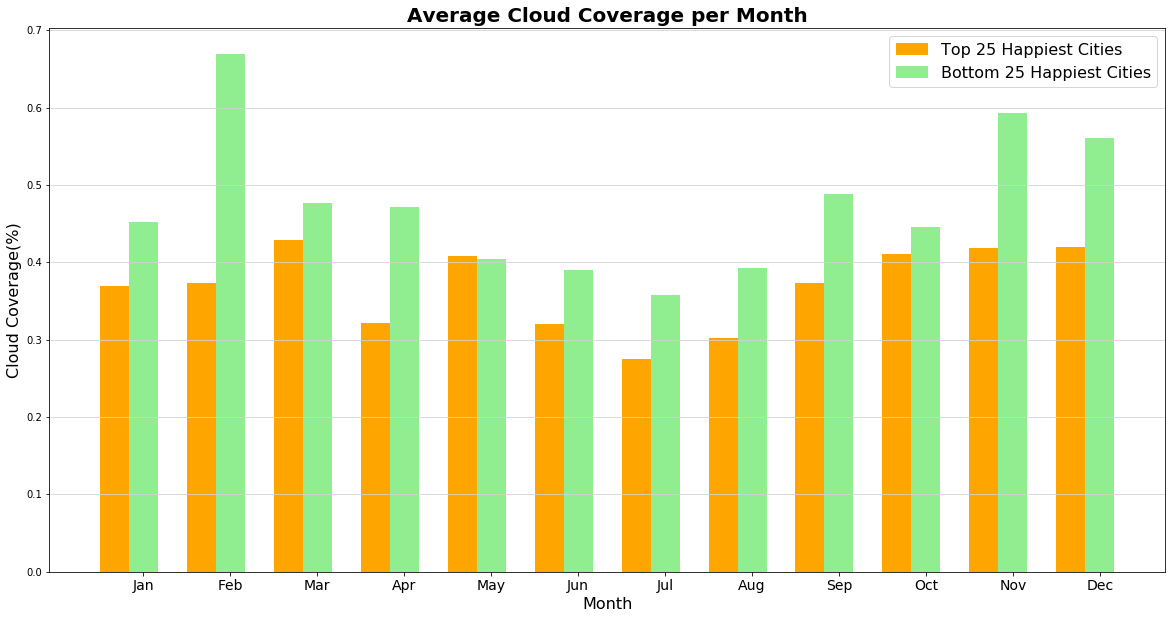

In [79]:
# Create Bar Graph for Average Cloud Coverage per Month
width = 1/2

indices=top_25_df.index
fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

width = np.min(np.diff(indices))/3

ax.bar(indices-width, top_25_df.Cloud_Cover, width, color="orange", label="Top 25 Happiest Cities")
ax.bar(indices, bottom_25_df.Cloud_Cover, width, color="lightgreen", label="Bottom 25 Happiest Cities")

plt.title("Average Cloud Coverage per Month", weight="bold", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Cloud Coverage(%)", fontsize=16)

plt.xticks(indices, months, fontsize=14)

plt.legend(loc="best", fontsize=16)

plt.grid(axis="y", color="lightgrey")

plt.savefig("Avg_Cloud_Cover_per_Month.png")

In [37]:
import scipy.stats as stats

In [34]:
print(top_25_df.Cloud_Cover.mean())
print(top_25_df.Cloud_Cover.var())

0.3685336765414328
0.002699984416711956


In [35]:
print(bottom_25_df.Cloud_Cover.mean())
print(bottom_25_df.Cloud_Cover.var())

0.47502815633232526
0.008516390027030538


In [38]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(top_25_df.Cloud_Cover, bottom_25_df.Cloud_Cover, equal_var=False)

Ttest_indResult(statistic=-3.483304732696815, pvalue=0.002777044194408711)

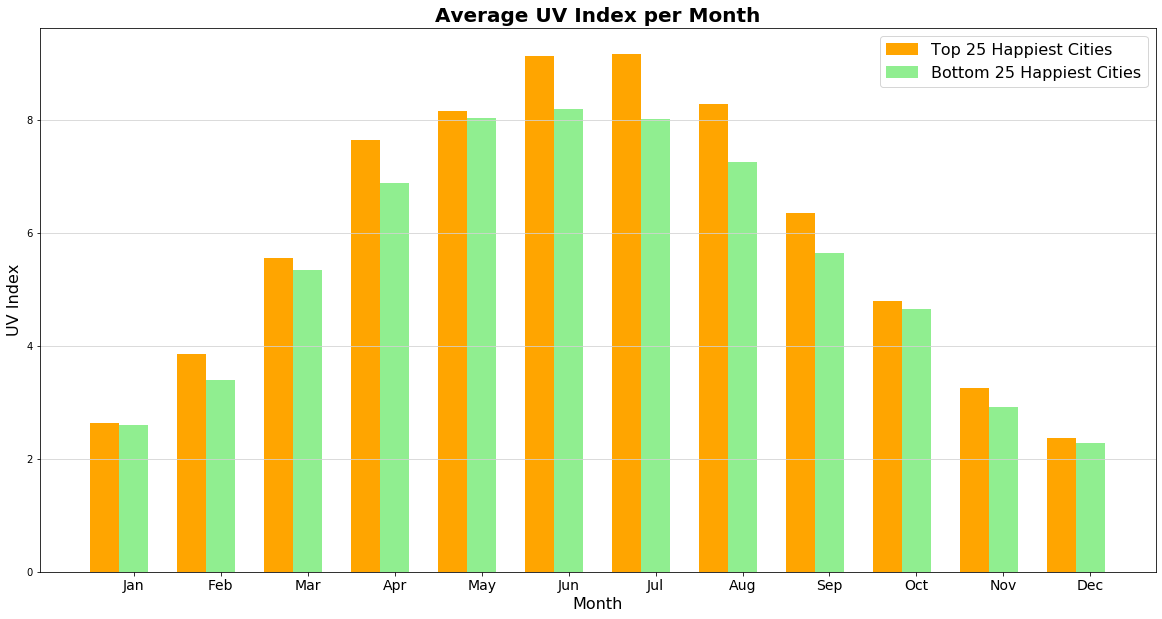

In [80]:
# Create Bar Graph for Average UV Index per Month
width = 1/2

indices=top_25_df.index

fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

width = np.min(np.diff(indices))/3

ax.bar(indices-width, top_25_df.UV_Index, width, color="orange", label="Top 25 Happiest Cities")
ax.bar(indices, bottom_25_df.UV_Index, width, color="lightgreen", label="Bottom 25 Happiest Cities")

plt.title("Average UV Index per Month", weight="bold", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("UV Index", fontsize=16)

plt.xticks(indices, months, fontsize=14)

plt.legend(loc="best", fontsize=16)

plt.grid(axis="y", color="lightgrey")

plt.savefig("Avg_UV_Index_per_Month.png")

In [69]:
print(top_25_df.UV_Index.mean())
print(top_25_df.UV_Index.var())

5.926040162056251
6.416721701743288


In [70]:
print(bottom_25_df.UV_Index.mean())
print(bottom_25_df.UV_Index.var())

5.428738649876757
5.06602185040451


In [71]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(top_25_df.UV_Index, bottom_25_df.UV_Index, equal_var=False)

Ttest_indResult(statistic=0.5083789619358664, pvalue=0.6163171775715099)

In [84]:
top_25_icon = top_25[top_25["Icon"] == 'clear-day']
top_25_icon_df = top_25_icon.groupby(["Month"])["Icon"].count().reset_index()
top_25_icon_df.head()

,Month,Icon
0,01,251
1,02,205
2,03,194
3,04,265
4,05,200


In [85]:
bottom_25_icon = bottom_25[bottom_25["Icon"] == 'clear-day']
bottom_25_icon_df = bottom_25_icon.groupby(["Month"])["Icon"].count().reset_index()
bottom_25_icon_df.head()

,Month,Icon
0,01,222
1,02,40
2,03,188
3,04,192
4,05,169


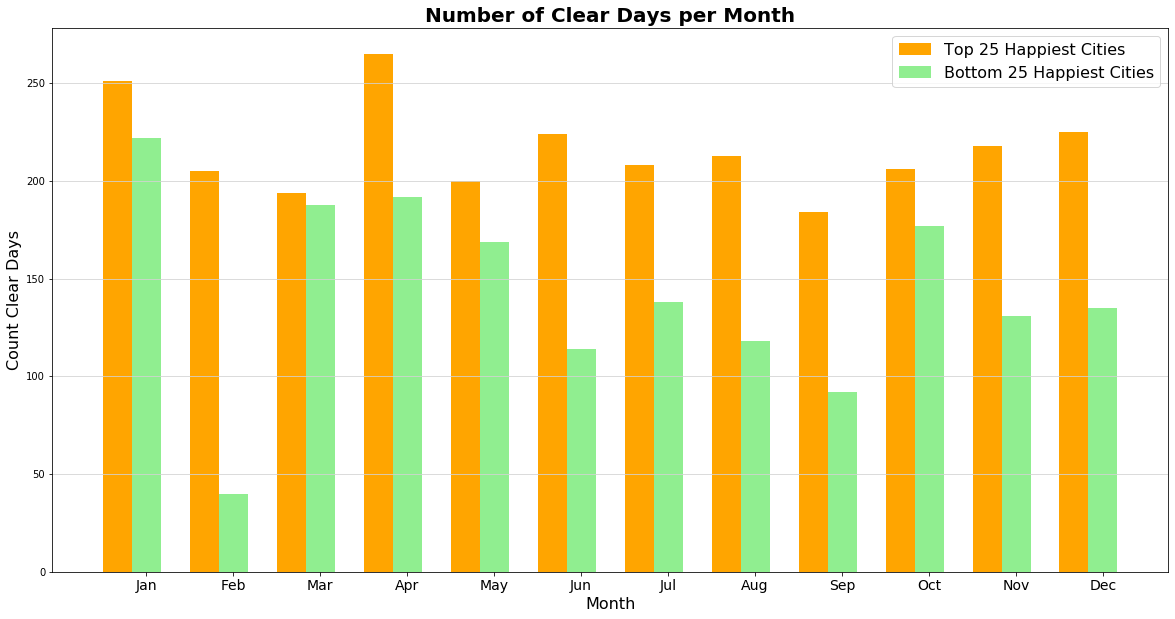

In [81]:
# Create Bar Graph for Average Cloud Coverage per Month
width = 1/2

indices=top_25_icon_df.index

fig=plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

width = np.min(np.diff(indices))/3

ax.bar(indices-width, top_25_icon_df.Icon, width, color="orange", label="Top 25 Happiest Cities")
ax.bar(indices, bottom_25_icon_df.Icon, width, color="lightgreen", label="Bottom 25 Happiest Cities")

plt.title("Number of Clear Days per Month", weight="bold", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Count Clear Days", fontsize=16)

plt.xticks(indices, months, fontsize=14)

plt.legend(loc="best", fontsize=16)

plt.grid(axis="y", color="lightgrey")

plt.savefig("Number_Clear_Days_per_Month.png")

In [72]:
print(top_25_icon_df.Icon.mean())
print(top_25_icon_df.Icon.var())

216.08333333333334
530.2651515151516


In [73]:
print(bottom_25_icon_df.Icon.mean())
print(bottom_25_icon_df.Icon.var())

143.0
2491.6363636363635


In [74]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(top_25_icon_df.Icon, bottom_25_icon_df.Icon, equal_var=False)

Ttest_indResult(statistic=4.6054154876791245, pvalue=0.0003174342518510019)